# Inhospital Mortality Logistic Regression 

# Part 0: Introduction

This notebook contains two main datasets: one is quantitative and the other is qualitative. They include features of hospital patients and their response of "dead" or "not dead." In total, there are 2,686 data points and 140 columns. My goal is to develop a robust predictive model for predicting "dead." (the response value is 1)

In the first part, I use Pandas to download the datasets and perform data cleaning, such as filling missing values, detecting outliers, and converting categorical variables to labels (not dummies, since there are hundreds of categorical variables). Then, I **inner merge** the two processed datasets into one for logistic regression analysis.

In the second part, I adopt an MLE solution via gradient ascent to run logistic regression. There are two key observations:

> If I use a smaller alpha and more iterations, the model can deliver higher prediction accuracy. For instance, when alpha = 0.01 and iterations run for 1,000 steps, the model misses only 4%. However, when alpha = 0.05 and iterations run for 500 steps, the model can't even predict 45% correctly!

> Since the data is highly imbalanced (i.e., the "dead" response only represents 4% of the observations, meaning the majority are false), the logistic regression model should be adjusted in the future, such as by adding weights to increase the penalty for false negatives.


**For the entire notebook, I mainly utilize Pandas DataFrame syntax and NumPy syntax. Also, visualization tool is applied.**

# Part 1: Data Processing

In [30]:
import os, numpy as np, scipy as sp, scipy.io
import pandas as pd

quantdf = pd.read_csv('Inhospital_Data_Quantitative.csv')
qualidf = pd.read_csv('Inhospital_Data_Qualitative.csv')
display(quantdf)
display(qualidf)

,studyid_adm,agecalc_adm,height_cm_adm,weight_kg_adm,muac_mm_adm,hr_bpm_adm,rr_brpm_app_adm,sysbp_mmhg_adm,diasbp_mmhg_adm,temp_c_adm,...,householdsize_adm,alivechildren_adm,deadchildren_adm,hematocrit_gpdl_adm,lactate_mmolpl_adm,lactate2_mmolpl_adm,glucose_mmolpl_adm,sqi1_perc_oxi_adm,sqi2_perc_oxi_adm,lengthadm
0,1,16.8,79.8,11.6,150.0,130.0,23.0,92.0,54.0,36.3,...,6.0,1.0,0.0,38.0,2.2,NaN,4.8,98.0,97.0,2
1,2,46.1,93.0,13.6,151.0,115.0,35.0,72.0,42.0,36.8,...,4.0,2.0,0.0,42.0,2.7,NaN,7.2,99.0,85.0,5
2,3,7.9,68.2,8.2,148.0,150.0,56.0,94.0,51.0,37.2,...,4.0,2.0,0.0,40.0,2.9,NaN,5.0,98.0,97.0,4
3,4,38.2,95.0,12.0,138.0,134.0,38.0,94.0,57.0,37.6,...,5.0,3.0,0.0,NaN,NaN,2.5,11.7,99.0,99.0,5
4,5,16.1,83.0,12.0,165.0,163.0,61.0,107.0,73.0,38.7,...,8.0,4.0,1.0,42.0,4.4,NaN,5.8,96.0,46.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681,2682,20.1,98.2,10.0,135.0,163.0,61.0,103.0,54.0,39.6,...,5.0,3.0,0.0,24.0,0.9,NaN,4.3,93.0,91.0,3
2682,2683,26.8,82.3,10.0,140.0,115.0,37.0,83.0,50.0,37.1,...,5.0,3.0,1.0,NaN,1.7,NaN,5.4,99.0,67.0,3
2683,2684,14.6,82.4,12.7,145.0,150.0,40.0,93.0,35.0,38.5,...,6.0,4.0,1.0,46.0,1.8,NaN,5.8,NaN,NaN,2
2684,2685,9.5,67.5,7.5,130.0,145.0,26.0,88.0,52.0,37.3,...,6.0,1.0,0.0,40.0,0.9,NaN,3.8,82.0,25.0,4


,studyid_adm,sex_adm,spo2onoxy_adm,oxygenavail_adm,respdistress_adm,caprefill_adm,bcseye_adm,bcsmotor_adm,bcsverbal_adm,admitabx_adm___1,...,cookfuel_adm___8,cookloc_adm,lightfuel_adm,tobacco_adm,bednet_adm,hctpretransfusion_adm,hivstatus_adm,malariastatuspos_adm,caregiver_adm_new,inhospital_mortality
0,1,Female,No,Oxygen available and not being used,No,No,Watches or follows,Localizes painful stimulus,"Cries appropriately with pain, or, if verbal, ...",Unchecked,...,Unchecked,In a separate building/building space used as ...,Electric bulbs (national grid),Never,Always,Yes,HIV negative,No,Mother,0
1,2,Female,No,Oxygen available and not being used,No,No,Watches or follows,Localizes painful stimulus,"Cries appropriately with pain, or, if verbal, ...",Checked,...,Unchecked,In a separate building/building space used as ...,Tadooba,Never,Always,Yes,HIV negative,Yes,Mother,0
2,3,Male,No,Oxygen available and not being used,No,No,Watches or follows,Localizes painful stimulus,"Cries appropriately with pain, or, if verbal, ...",Checked,...,Unchecked,In a separate building/building space used as ...,Tadooba,Never,Always,Yes,HIV negative,No,Mother,0
3,4,Female,No,Oxygen available and not being used,No,No,Watches or follows,Localizes painful stimulus,"Cries appropriately with pain, or, if verbal, ...",Unchecked,...,Unchecked,In the house where you sleep,Electric bulbs (national grid),Never,Always,NaN,HIV negative,Yes,Mother,0
4,5,Female,No,Oxygen available and not being used,No,No,Watches or follows,Localizes painful stimulus,"Cries appropriately with pain, or, if verbal, ...",Checked,...,Unchecked,Outdoors in the open,Electric bulbs (national grid),Never,Sometimes,Yes,HIV negative,Yes,Mother,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681,2682,Female,Yes,Oxygen available and being used,Yes,No,Watches or follows,Localizes painful stimulus,"Cries appropriately with pain, or, if verbal, ...",Unchecked,...,Unchecked,Outdoors in the open,Solar powered bulbs,Never,Always,Yes,HIV negative,No,Mother,0
2682,2683,Female,No,Oxygen available and not being used,No,No,Watches or follows,Localizes painful stimulus,"Cries appropriately with pain, or, if verbal, ...",Unchecked,...,Unchecked,Outdoors in the open,Electric bulbs (national grid),Never,Sometimes,NaN,HIV negative,No,Mother,0
2683,2684,Female,No,Oxygen available and not being used,No,No,Watches or follows,Localizes painful stimulus,"Cries appropriately with pain, or, if verbal, ...",Unchecked,...,Unchecked,In a separate building/building space used as ...,Electric bulbs (national grid),Never,Always,Yes,HIV negative,Yes,Mother,0
2684,2685,Female,No,Oxygen available and not being used,No,No,Watches or follows,Localizes painful stimulus,"Cries appropriately with pain, or, if verbal, ...",Checked,...,Unchecked,In a separate building/building space used as ...,Solar powered bulbs,Never,Always,Yes,HIV negative,No,Mother,0


In [31]:
# Count the number of columns and rows
print(f"The quantative data has {quantdf.shape[0]} rows, and {quantdf.shape[1]} columns")
print(f"The qualitative data has {qualidf.shape[0]} rows, and {qualidf.shape[1]} columns")

The quantative data has 2686 rows, and 25 columns
The qualitative data has 2686 rows, and 116 columns


In [32]:
# check the basic stats for quantitative variables
quantdf.describe()

,studyid_adm,agecalc_adm,height_cm_adm,weight_kg_adm,muac_mm_adm,hr_bpm_adm,rr_brpm_app_adm,sysbp_mmhg_adm,diasbp_mmhg_adm,temp_c_adm,...,householdsize_adm,alivechildren_adm,deadchildren_adm,hematocrit_gpdl_adm,lactate_mmolpl_adm,lactate2_mmolpl_adm,glucose_mmolpl_adm,sqi1_perc_oxi_adm,sqi2_perc_oxi_adm,lengthadm
count,2686.000000,2686.00000,2672.000000,2677.000000,2673.000000,2685.000000,2681.000000,2684.000000,2685.000000,2685.000000,...,2683.000000,2682.00000,2685.000000,2229.000000,2222.000000,469.000000,2677.000000,2556.000000,2479.000000,2686.000000
mean,1343.500000,21.12338,79.659401,9.577265,138.076693,141.219367,46.179784,96.941133,54.594041,37.470503,...,5.142751,3.02349,0.354935,32.954240,2.774887,2.951599,6.320882,88.780516,78.004841,5.377141
std,775.525736,13.05725,11.110075,2.796121,15.934621,25.550612,14.871732,11.876974,11.005274,1.007606,...,2.132131,1.81805,0.810868,9.750002,2.123403,2.234946,2.512912,16.714758,23.383975,7.654527
min,1.000000,5.90000,56.000000,2.610000,75.000000,42.000000,17.000000,58.000000,15.000000,33.600000,...,2.000000,0.00000,0.000000,6.000000,0.500000,0.200000,0.000000,0.000000,0.000000,-85.000000
25%,672.250000,10.52500,71.500000,7.640000,130.000000,128.000000,35.000000,89.000000,48.000000,36.700000,...,4.000000,2.00000,0.000000,28.000000,1.500000,1.400000,5.000000,87.000000,68.000000,3.000000
50%,1343.500000,16.90000,78.000000,9.000000,140.000000,143.000000,44.000000,96.000000,54.000000,37.200000,...,5.000000,3.00000,0.000000,34.000000,2.100000,2.300000,6.000000,96.000000,87.000000,4.000000
75%,2014.750000,28.67500,86.700000,11.000000,149.000000,158.000000,56.000000,104.000000,62.000000,38.200000,...,6.000000,4.00000,0.000000,40.000000,3.300000,3.700000,7.200000,99.000000,96.000000,6.000000
max,2686.000000,61.80000,122.000000,22.000000,190.000000,214.000000,116.000000,159.000000,103.000000,40.600000,...,19.000000,11.00000,9.000000,82.000000,18.900000,15.900000,24.200000,99.000000,99.000000,210.000000


In [33]:
# check whether there exist duplicate values - NO
print(quantdf.duplicated().any())
print(qualidf.duplicated().any())

False
False


In [34]:
# check the columns with missing values for quantitative data
print("Columns with missing values for quantitative data:\n")
quant_mis=pd.DataFrame(quantdf.isna().sum()[quantdf.isna().sum() > 0])
quant_mis.columns=['Count']
quant_mis['Percentage']=quant_mis['Count'].apply(lambda x:x/quantdf.shape[0])
display(quant_mis)

# remove columns which has more than 10% missing values
quantdf_less_mis=quantdf.drop(quant_mis[quant_mis['Percentage'] > 0.1].index,axis=1)
print(f"The quantative data has {quantdf_less_mis.shape[0]} rows, and {quantdf_less_mis.shape[1]} columns left after removing columns with more than 10% missing values")

Columns with missing values for quantitative data:



,Count,Percentage
height_cm_adm,14,0.005212
weight_kg_adm,9,0.003351
muac_mm_adm,13,0.004840
hr_bpm_adm,1,0.000372
rr_brpm_app_adm,5,0.001862
sysbp_mmhg_adm,2,0.000745
diasbp_mmhg_adm,1,0.000372
temp_c_adm,1,0.000372
spo2site1_pc_oxi_adm,4,0.001489
spo2site2_pc_oxi_adm,205,0.076322


The quantative data has 2686 rows, and 21 columns left after removing columns with more than 10% missing values


**A note about removing missing values.** Although there's no strict rule, typically more than 10% missing values are considered unacceptable.

In [37]:
# check the columns with missing values for qualitative data
print("Columns with missing values for qualitative data:\n")
qualidf_mis=pd.DataFrame(qualidf.isna().sum()[qualidf.isna().sum() > 0])
qualidf_mis.columns=['Count']
qualidf_mis['Percentage']=qualidf_mis['Count'].apply(lambda x:x/qualidf.shape[0])
display(qualidf_mis)

Columns with missing values for qualitative data:



,Count,Percentage
spo2onoxy_adm,4,0.001489
respdistress_adm,2,0.000745
caprefill_adm,1,0.000372
bcseye_adm,1,0.000372
bcsverbal_adm,2,0.000745
vaccmeasles_adm,2,0.000745
vaccmeaslessource_adm,946,0.352197
vaccpneumocsource_adm,185,0.068876
vaccdpt_adm,2,0.000745
vaccdptsource_adm,143,0.053239


In [38]:
# remove columns which has more than 10% missing values
qualidf_less_mis=qualidf.drop(qualidf_mis[qualidf_mis['Percentage'] > 0.1].index,axis=1)
print(f"The qualitative data has {qualidf_less_mis.shape[0]} rows, and {qualidf_less_mis.shape[1]} columns left after removing columns with more than 10% missing values")

The qualitative data has 2686 rows, and 114 columns left after removing columns with more than 10% missing values


In [40]:
# impute the missing values for the rest 
quantdf_less_mis.fillna({col: quantdf_less_mis[col].mean() for col in quantdf_less_mis.columns}, inplace=True)
qualidf_less_mis.fillna({col: qualidf_less_mis[col].mode()[0] for col in qualidf_less_mis.columns}, inplace=True)

# check whether the imputation is successful - YES
print(quantdf_less_mis.isna().sum(),"\n")
print(qualidf_less_mis.isna().sum(),"\n")

studyid_adm             0
agecalc_adm             0
height_cm_adm           0
weight_kg_adm           0
muac_mm_adm             0
hr_bpm_adm              0
rr_brpm_app_adm         0
sysbp_mmhg_adm          0
diasbp_mmhg_adm         0
temp_c_adm              0
spo2site1_pc_oxi_adm    0
spo2site2_pc_oxi_adm    0
momage_adm              0
momagefirstpreg_adm     0
householdsize_adm       0
alivechildren_adm       0
deadchildren_adm        0
glucose_mmolpl_adm      0
sqi1_perc_oxi_adm       0
sqi2_perc_oxi_adm       0
lengthadm               0
dtype: int64 

studyid_adm              0
sex_adm                  0
spo2onoxy_adm            0
oxygenavail_adm          0
respdistress_adm         0
                        ..
hctpretransfusion_adm    0
hivstatus_adm            0
malariastatuspos_adm     0
caregiver_adm_new        0
inhospital_mortality     0
Length: 114, dtype: int64 



In [41]:
# Detecting Outliers Using Z-Score for quantitative variables
def compute_zscore(data):
    n_row=data.shape[0]
    zscore_df=pd.DataFrame()
    
    for column in data.columns:
        avg_value=np.mean(data[column])
        var=0            
        var += sum((data[column].iloc[i] - avg_value) ** 2 / n_row for i in range(n_row))
        std=var**0.5
        zscore = (data[column] - avg_value) / std
        zscore_df[column]=zscore
        
    return zscore_df
compute_zscore(quantdf_less_mis)  

,studyid_adm,agecalc_adm,height_cm_adm,weight_kg_adm,muac_mm_adm,hr_bpm_adm,rr_brpm_app_adm,sysbp_mmhg_adm,diasbp_mmhg_adm,temp_c_adm,...,spo2site2_pc_oxi_adm,momage_adm,momagefirstpreg_adm,householdsize_adm,alivechildren_adm,deadchildren_adm,glucose_mmolpl_adm,sqi1_perc_oxi_adm,sqi2_perc_oxi_adm,lengthadm
0,-1.731406,-0.331171,0.012691,0.724758,0.750222,-0.439267,-1.560391,-0.416259,-0.053998,-1.162100,...,0.695086,-0.069661,1.158248,0.402362,-1.114038,-0.437885,-0.606357,0.565541,0.845721,-0.441277
1,-1.730116,1.913211,1.204133,1.441370,0.813143,-1.026556,-0.752588,-2.101131,-1.144790,-0.665689,...,-0.629803,0.426431,1.775212,-0.536366,-0.563485,-0.437885,0.350494,0.626883,0.311445,-0.049279
2,-1.728827,-1.012912,-1.034334,-0.493482,0.624381,0.343784,0.661066,-0.247772,-0.326696,-0.268561,...,0.695086,-0.565753,-0.075680,-0.536366,-0.563485,-0.437885,-0.526619,0.565541,0.845721,-0.179945
3,-1.727537,1.308070,1.384654,0.868080,-0.004826,-0.282657,-0.550638,-0.247772,0.218700,0.128568,...,0.695086,0.591795,0.541284,-0.067002,-0.012932,-0.437885,2.144588,0.626883,0.934767,-0.049279
4,-1.726247,-0.384791,0.301525,0.868080,1.694031,0.852768,0.997651,0.847395,1.673090,1.220671,...,-0.795414,2.576163,0.849766,1.341090,0.537620,0.795821,-0.207669,0.442857,-1.424950,0.212052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681,1.726247,-0.078391,1.673489,0.151469,-0.193587,0.852768,0.997651,0.510421,-0.053998,2.114210,...,0.363864,-0.069661,0.849766,-0.067002,-0.012932,-0.437885,-0.805700,0.258831,0.578583,-0.310611
2682,1.727537,0.434829,0.238343,0.151469,0.121016,-1.026556,-0.617955,-1.174451,-0.417595,-0.367843,...,0.198253,-1.723301,-1.001125,-0.067002,-0.012932,0.795821,-0.367144,0.626883,-0.489968,-0.310611
2683,1.728827,-0.499691,0.247369,1.118895,0.435619,0.343784,-0.416004,-0.332015,-1.781086,1.022107,...,0.000000,1.253251,-0.692643,0.402362,0.537620,0.795821,-0.207669,0.000000,0.000000,-0.441277
2684,1.730116,-0.890352,-1.097517,-0.744296,-0.508191,0.148022,-1.358440,-0.753233,-0.235797,-0.169279,...,0.695086,-1.061845,-0.692643,0.402362,-1.114038,-0.437885,-1.005044,-0.415930,-2.359932,-0.179945


In [42]:
# detecting outliers for removal
def detect_outliers(data,threshold=3): 
    zscore_df=compute_zscore(data)
    outlier_df = pd.DataFrame(columns=['Count','Percentage']) 
    for column in zscore_df.columns:
        outlier_df.loc[column] = (zscore_df[column].abs() > threshold).sum() 
    outlier_df['Percentage']=outlier_df['Count']/data.shape[0]
    display(outlier_df)
    
detect_outliers(quantdf_less_mis,threshold=3)

,Count,Percentage
studyid_adm,0,0.0
agecalc_adm,4,0.001489
height_cm_adm,8,0.002978
weight_kg_adm,29,0.010797
muac_mm_adm,20,0.007446
hr_bpm_adm,51,0.018987
rr_brpm_app_adm,22,0.008191
sysbp_mmhg_adm,19,0.007074
diasbp_mmhg_adm,20,0.007446
temp_c_adm,4,0.001489


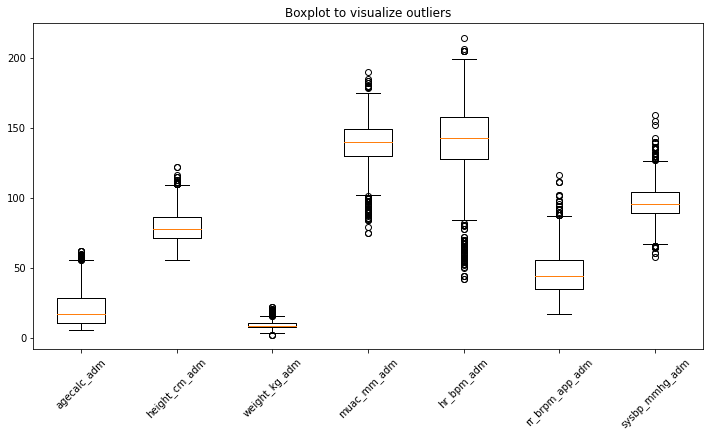

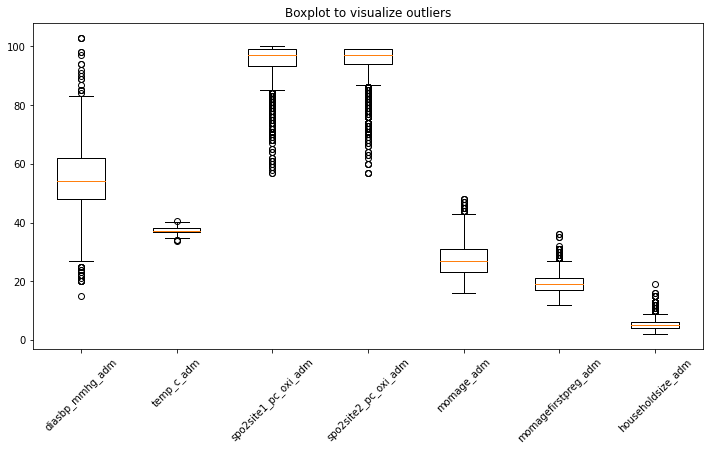

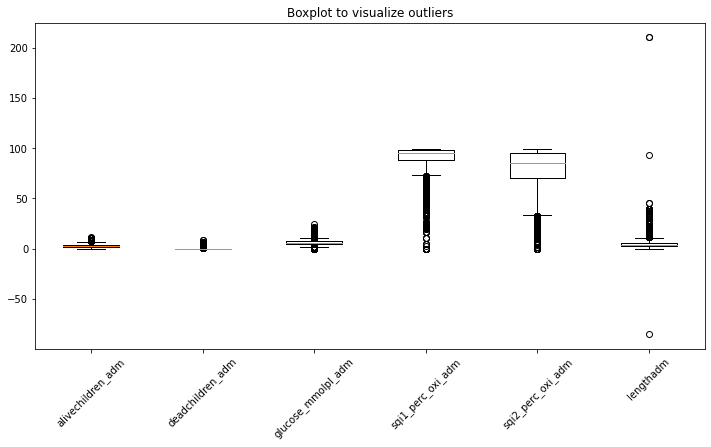

In [43]:
import matplotlib.pyplot as plt  

# boxplot to visualize outliers 
plt.figure(figsize=(12, 6))
plt.boxplot(quantdf_less_mis.iloc[:, 1:8].values)
plt.xticks(range(1, 8), quantdf_less_mis.columns[1:8], rotation=45)
plt.title("Boxplot to visualize outliers")
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot(quantdf_less_mis.iloc[:, 8:15].values)
plt.xticks(range(1, 8), quantdf_less_mis.columns[8:15], rotation=45)
plt.title("Boxplot to visualize outliers")
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot(quantdf_less_mis.iloc[:, 15:21].values)
plt.xticks(range(1, 7), quantdf_less_mis.columns[15:21], rotation=45)
plt.title("Boxplot to visualize outliers")
plt.show()


In [44]:
# convert categorical data to labels
for column in qualidf_less_mis.columns[1:]:
    qualidf_less_mis[column] = pd.factorize(qualidf_less_mis[column])[0]
display(qualidf_less_mis)

,studyid_adm,sex_adm,spo2onoxy_adm,oxygenavail_adm,respdistress_adm,caprefill_adm,bcseye_adm,bcsmotor_adm,bcsverbal_adm,admitabx_adm___1,...,cookfuel_adm___8,cookloc_adm,lightfuel_adm,tobacco_adm,bednet_adm,hctpretransfusion_adm,hivstatus_adm,malariastatuspos_adm,caregiver_adm_new,inhospital_mortality
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,3,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,5,0,0,0,0,0,0,0,0,1,...,0,2,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681,2682,0,1,1,1,0,0,0,0,0,...,0,2,2,0,0,0,0,0,0,0
2682,2683,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
2683,2684,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2684,2685,0,0,0,0,0,0,0,0,1,...,0,0,2,0,0,0,0,0,0,0


In [45]:
# combine quantative data and qualitative data
data_processed=quantdf_less_mis.merge(qualidf_less_mis, left_on='studyid_adm', right_on='studyid_adm')
display(data_processed)

,studyid_adm,agecalc_adm,height_cm_adm,weight_kg_adm,muac_mm_adm,hr_bpm_adm,rr_brpm_app_adm,sysbp_mmhg_adm,diasbp_mmhg_adm,temp_c_adm,...,cookfuel_adm___8,cookloc_adm,lightfuel_adm,tobacco_adm,bednet_adm,hctpretransfusion_adm,hivstatus_adm,malariastatuspos_adm,caregiver_adm_new,inhospital_mortality
0,1,16.8,79.8,11.6,150.0,130.0,23.0,92.0,54.0,36.3,...,0,0,0,0,0,0,0,0,0,0
1,2,46.1,93.0,13.6,151.0,115.0,35.0,72.0,42.0,36.8,...,0,0,1,0,0,0,0,1,0,0
2,3,7.9,68.2,8.2,148.0,150.0,56.0,94.0,51.0,37.2,...,0,0,1,0,0,0,0,0,0,0
3,4,38.2,95.0,12.0,138.0,134.0,38.0,94.0,57.0,37.6,...,0,1,0,0,0,0,0,1,0,0
4,5,16.1,83.0,12.0,165.0,163.0,61.0,107.0,73.0,38.7,...,0,2,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681,2682,20.1,98.2,10.0,135.0,163.0,61.0,103.0,54.0,39.6,...,0,2,2,0,0,0,0,0,0,0
2682,2683,26.8,82.3,10.0,140.0,115.0,37.0,83.0,50.0,37.1,...,0,2,0,0,1,0,0,0,0,0
2683,2684,14.6,82.4,12.7,145.0,150.0,40.0,93.0,35.0,38.5,...,0,0,0,0,0,0,0,1,0,0
2684,2685,9.5,67.5,7.5,130.0,145.0,26.0,88.0,52.0,37.3,...,0,0,2,0,0,0,0,0,0,0


# Part 2: Logistic Regression

In [46]:
# Unbalanced dataset - only 4% of observations has response value  equal "1"
print(sum(data_processed['inhospital_mortality']==1)/(data_processed.shape[0]-1))

0.04432029795158287


In [47]:
def heaviside_int(Y):
    """Evaluates the heaviside function, but returns integer values."""
    return 1.0*(Y > 0.0).astype(dtype=int)  

def gen_lin_discr_labels(points, theta, fun=heaviside_int):
    """
    Given a set of points and the coefficients of a linear
    discriminant, this function returns a set of labels for
    the points with respect to this discriminant.
    """
    score = points.dot(theta)
    labels = fun(score)
    return labels

def mark_matches(a, b, exact=False):
    """
    Given two Numpy arrays of {0, 1} labels, returns a new boolean
    array indicating at which locations the input arrays have the
    same label (i.e., the corresponding entry is True).
    
    This function can consider "inexact" matches. That is, if `exact`
    is False, then the function will assume the {0, 1} labels may be
    regarded as the same up to a swapping of the labels. This feature
    allows
    
      a == [0, 0, 1, 1, 0, 1, 1]
      b == [1, 1, 0, 0, 1, 0, 0]
      
    to be regarded as equal. (That is, use `exact=False` when you
    only care about "relative" labeling.)
    """
    assert a.shape == b.shape
    a_int = a.astype(dtype=int)
    b_int = b.astype(dtype=int)
    all_axes = tuple(range(len(a.shape)))
    assert ((a_int == 0) | (a_int == 1)).all()
    assert ((b_int == 0) | (b_int == 1)).all()
    
    exact_matches = (a_int == b_int)
    if exact:
        return exact_matches

    assert exact == False
    num_exact_matches = np.sum(exact_matches)
    if (2*num_exact_matches) >= np.prod(a.shape):
        return exact_matches
    return exact_matches == False # Invert
    
def count_matches(a, b, exact=False):
    """
    Given two sets of {0, 1} labels, returns the number of mismatches.
    
    This function can consider "inexact" matches. That is, if `exact`
    is False, then the function will assume the {0, 1} labels may be
    regarded as similar up to a swapping of the labels. This feature
    allows
    
      a == [0, 0, 1, 1, 0, 1, 1]
      b == [1, 1, 0, 0, 1, 0, 0]
      
    to be regarded as equal. (That is, use `exact=False` when you
    only care about "relative" labeling.)
    """
    matches = mark_matches(a, b, exact=exact)
    return int(matches.sum())
    
def grad_log_likelihood(theta, y, X):
    """Returns the gradient of the log-likelihood."""
    return X.T.dot(y - logistic(X.dot(theta)))

def logistic(Y):    
    return 1.0 / (1.0 + np.exp (-Y))

In [22]:
# Get the data coordinate matrix, X, and labels vector, y
X = np.array(data_processed.drop(columns=['inhospital_mortality', 'studyid_adm']))
y = np.array(data_processed['inhospital_mortality'].astype(float))

def logistic_MLE_gradient(X,y,ALPHA,MAX_STEP):  
    # Store *all* guesses, for subsequent analysis
    thetas = np.zeros((X.shape[1], MAX_STEP+1))    
    for t in range(MAX_STEP):    
        theta_t = thetas[:, t:t+1]
        delta_t = grad_log_likelihood(theta_t, y, X).sum(axis=1)/X.shape[0]
        delta_t = delta_t[:, np.newaxis]
        delta_t = delta_t / np.linalg.norm(delta_t, ord=2)
        thetas[:, t+1:t+2] = theta_t + ALPHA*delta_t        
    theta_ga = thetas[:, MAX_STEP:]
    ga_labels = gen_lin_discr_labels (X, theta_ga)
    ga_mismatches = 1 - count_matches (y.reshape((len(y), 1)), ga_labels)/len (y)
    return ga_mismatches

print ("\n=== ALPHA = 0.01,MAX_STEP = 1000 ===")
ga_mismatches=logistic_MLE_gradient(X,y,0.01,1000)
print ("The MLE method produces", ga_mismatches, "mismatches.\n")
print ("\n=== ALPHA = 0.05,MAX_STEP = 500 ===")
ga_mismatches=logistic_MLE_gradient(X,y,0.05,500)
print ("The MLE method produces", ga_mismatches, "mismatches.\n")


=== ALPHA = 0.01,MAX_STEP = 1000 ===
The MLE method produces 0.044303797468354444 mismatches.


=== ALPHA = 0.05,MAX_STEP = 500 ===
The MLE method produces 0.42405063291139244 mismatches.



**Fin!** This notebook ends here. Thanks for peerview!